Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# use the 'magic' symbol (%) to specify some non-python code (i.e., affects the underlying jupyter kernel).
%matplotlib inline
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.
if you are using another editor, you'll use: 
 plt.show() 
at the end of all your plotting commands to have the figure pop up in another window.
'''

"\nThat line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.\nif you are using another editor, you'll use: \n plt.show() \nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [0]:
# Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast') 
# "fast" is actually the default style, so you don't necessarily have to set it.

In [4]:
# List of other available plot styles you can use instead of "fast".
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Part 1. The Pandas built-in visualization tool

This is useful only for simple, quick-and-dirty plots. Read the full documentation. For anything more complex you'll want to use a more robust visualization package such as matplotlib, seaborn, or plotly.

"Under the hood, pandas plots graphs with the matplotlib library. This is usually pretty convenient since it allows you to just .plot your graphs, but since matplotlib is kind of a train wreck pandas inherits that confusion." J. Sonoma

In [5]:
#read the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [6]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin class']=df['Pclass'].map({1:'First', 2:'Second', 3:'Third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin class
0,0,3,male,22.0,7.2500,Southampton,Third
1,1,1,female,38.0,71.2833,Cherbourg,First
2,1,3,female,26.0,7.9250,Southampton,Third
3,1,1,female,35.0,53.1000,Southampton,First
4,0,3,male,35.0,8.0500,Southampton,Third


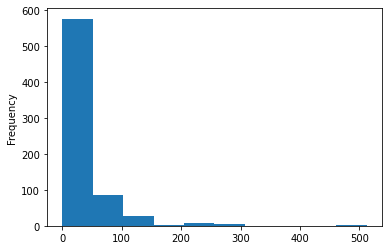

In [7]:
# Fare is a continuous variable, so we can display it with a histogram.
df['Fare'].plot(kind='hist');

In [8]:
# A continuous variable can be converted to a categorical var using binning.
farebins = [0, 8, 15, 33, 512]
farelabels=['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels)
my_result = df['fare_groups'].value_counts().sort_index()
my_result



low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

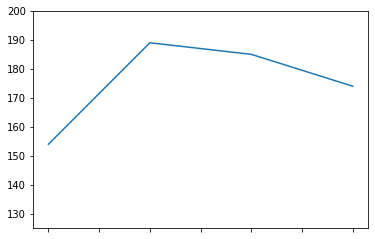

In [9]:
# sometimes it's important to specify the range of your y-axis to get more accurate results. 'lim'='limits'
my_result.plot(ylim=(125,200));

**Display a single continuous variable**

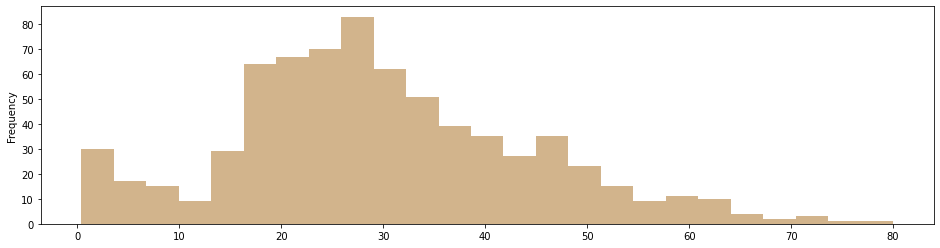

In [10]:
#histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

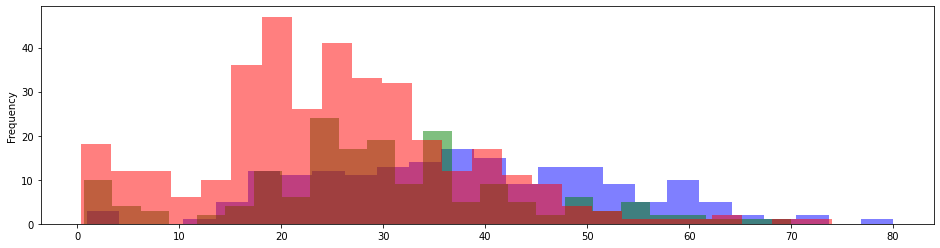

In [11]:
# Stacked Histogram of continuous variable, broken out by categorical variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4),color='b', alpha=0.5);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='g', alpha=0.5);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='r', alpha=0.5);

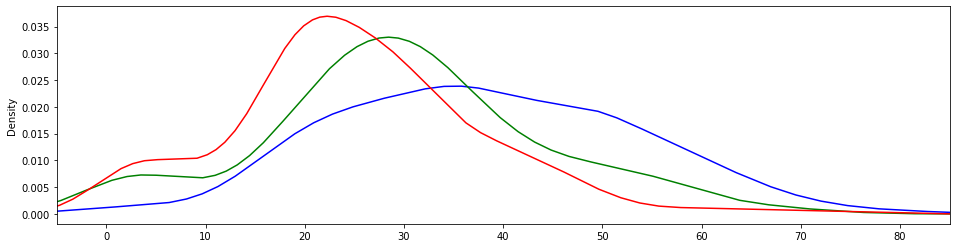

In [12]:
# But this is actually easier to read using a Kernel Density Estimate (KDE). Note the use of 'xlim'.
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5,85), figsize=(16,4),color='b');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5,85), figsize=(16,4), color='g');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5,85), figsize=(16,4), color='r');


**Display a single categorical variable**

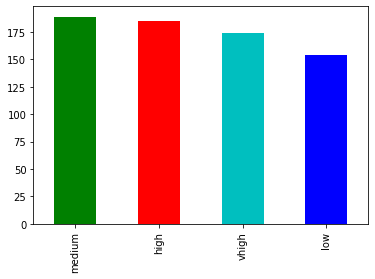

In [13]:
# Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().plot(kind='bar', color=['g','r','c','b']);

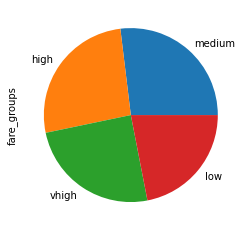

In [14]:
#pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

**Compare two categorical variables**

In [15]:
# Compare two categorical variables using crosstab
cabdeath = pd.crosstab(df['cabin class'], df['Survived'])
cabdeath

Survived,0,1
cabin class,,
First,64,120
Second,90,83
Third,270,85


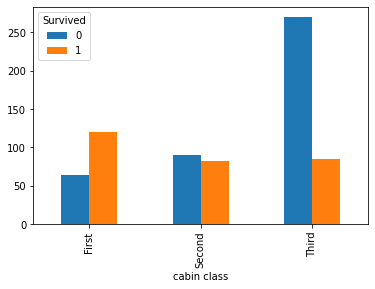

In [16]:
#make that into a bar chart
cabdeath.plot(kind='bar');

In [17]:
# Crosstab with column percents.
cabdeath2=pd.crosstab(df['cabin class'], df['Survived'], normalize='columns')
cabdeath2

Survived,0,1
cabin class,,
First,0.150943,0.416667
Second,0.212264,0.288194
Third,0.636792,0.295139


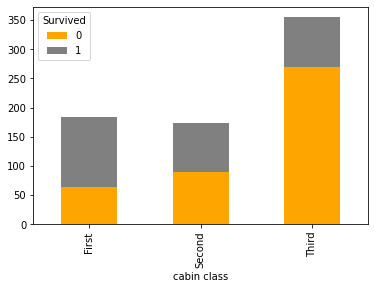

In [18]:
# make a stacked bar chart, for easy comparison of two categorical variables.
cabdeath.plot(kind='bar', stacked=True, color=['orange', 'gray']);


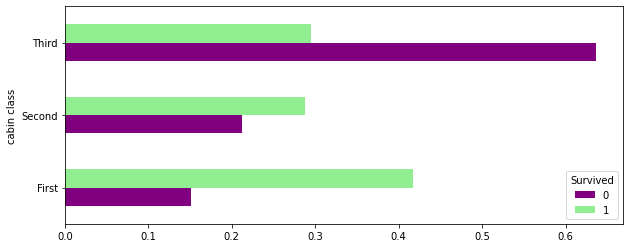

In [19]:
# A paired barchart for comparison of two categorical variables. Note the use of 'barh'.
cabdeath2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));


**Compare a categorical and continuous variable**

In [20]:
#lets look at a single continuous variable
df['Age'].mean()

29.64209269662921

In [21]:
# Now explore that continuous variable broken out by a categorical (i.e., categorical) variable.
cab_age = df.groupby(df['cabin class'])['Age'].mean()
cab_age

cabin class
First     38.105543
Second    29.877630
Third     25.140620
Name: Age, dtype: float64

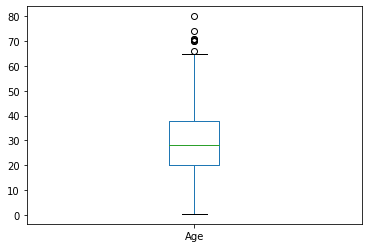

In [22]:
 #To visualize a single continuous variable, you can just use `.plot` with `kind=box`
 df['Age'].plot(kind='box');

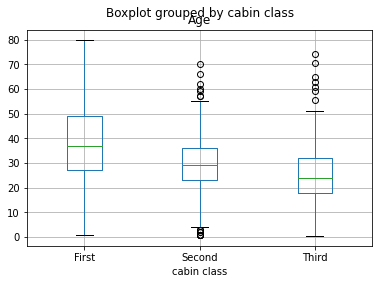

In [23]:
# But to break out a continuous variable by a categorical variable, use `.boxplot`
df.boxplot(column='Age', by='cabin class');

Compare two or three continuous variables

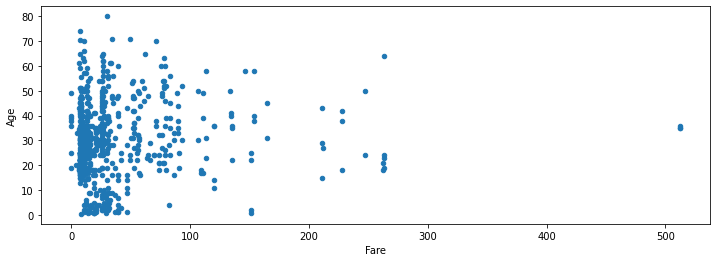

In [24]:
#two continuous variable age by fare 
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4));

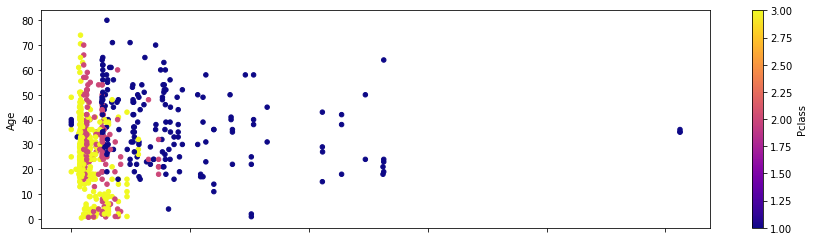

In [25]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

**Use a line plot to examine two continuous variables (often time)**

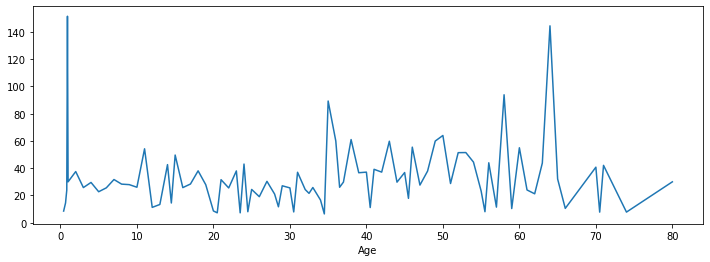

In [26]:
#line chart: age by fare
df.groupby(['Age'])['Fare'].mean().plot(figsize=(12,4));

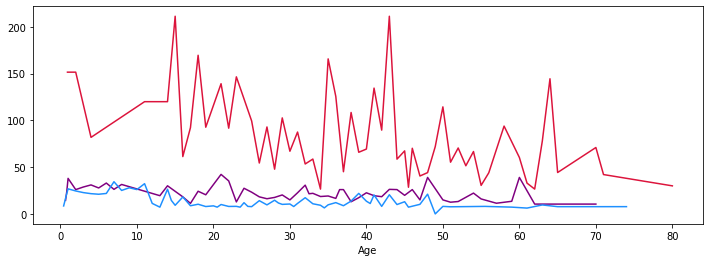

In [27]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [1,2,3]:
    df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

**Compare multiple continuous variables**

In [28]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.356462,-0.082446,0.266100
Pclass,-0.356462,1.000000,-0.365902,-0.552893
Age,-0.082446,-0.365902,1.000000,0.093143
Fare,0.266100,-0.552893,0.093143,1.000000


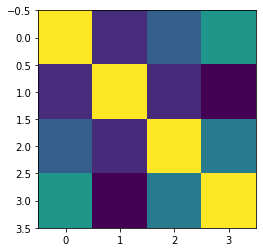

In [29]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

but this actually is easier and better looking if you use seaborn code.

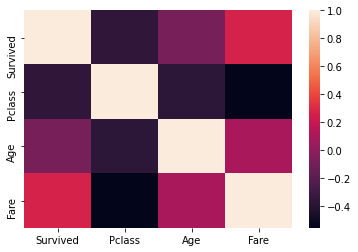

In [30]:
sns.heatmap(corr_matrix);

Intro to matplotlib

Basic example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

** The data we want to plot:**

In [0]:
x = np.linspace(0, 5, 11)
y = x ** 2

In [32]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [33]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

Basic Matplotlib Commands

We can create a very simple line plot using the following ( I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).

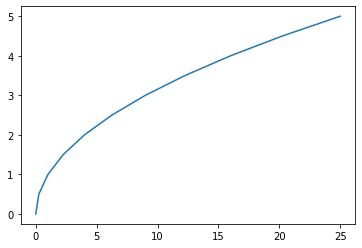

In [34]:
# a very simple plot, to get started. Notice that NO PANDAS is required!
plt.plot(y,x);

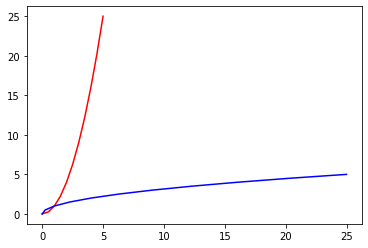

In [35]:
# You can have two 'plt' plots together (and let's add some color).
plt.plot(x, y, 'r') 
plt.plot(y, x, 'b');

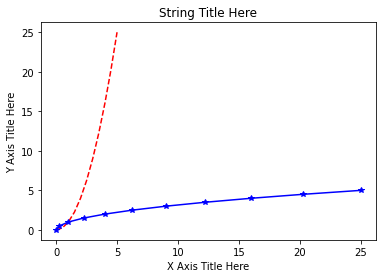

In [36]:
# Now add some labels, plus a little texture.
plt.plot(x, y, 'r--') 
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

Creating Multiplots on Same Canvas

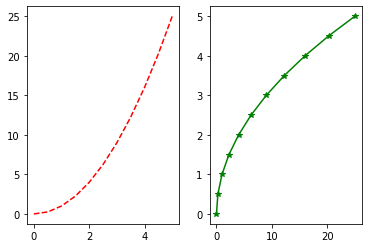

In [37]:
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

Matplotlib Object Oriented Method

Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

In Matplotlib, the figure (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class plt.Axes) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. We'll commonly use the variable name fig to refer to a figure instance, and ax to refer to an axes instance or group of axes instances. Once we have created an axes, we can use the ax.plot function to plot some data. https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html

The .figure() method
To begin we create a figure instance. Then we can add axes to that figure:

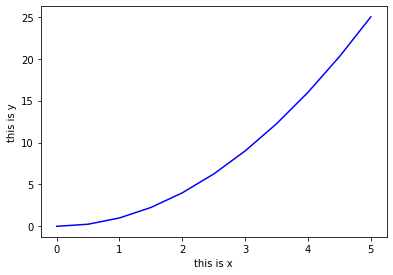

In [38]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)


# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('this is x') # Notice the use of set_ to begin methods
axes.set_ylabel('this is y')
plt.show()

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

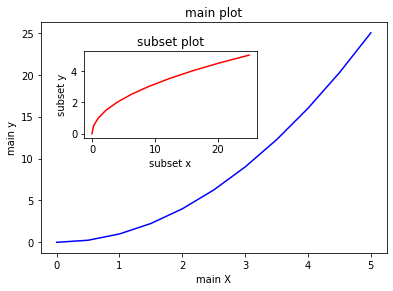

In [39]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('main X')
axes1.set_ylabel('main y')
axes1.set_title('main plot')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('subset x')
axes2.set_ylabel('subset y')
axes2.set_title('subset plot');

The subplots() method

The plt.subplots() object will act as a more automatic axis manager. It is somewhat more common than using .figure()
plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

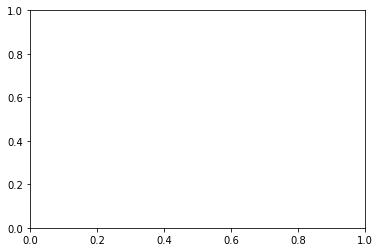

In [40]:
fig, ax = plt.subplots()


is more concise than this:

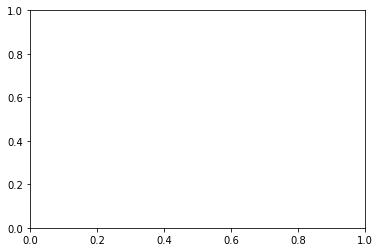

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

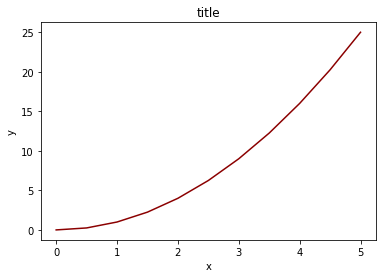

In [42]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1) # The default is `(1, 1)` so you don't actually have to specify this.

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

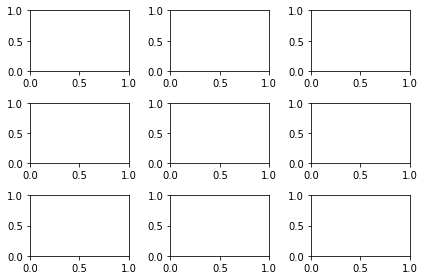

In [43]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=3, ncols=3) # the parameter labels `nrows` and `ncols` are optional.

fig    
plt.tight_layout() # more about `.tight_layout()` below.

In [44]:
# Axes is an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d6325710>,
      dtype=object)

We can iterate through this array:

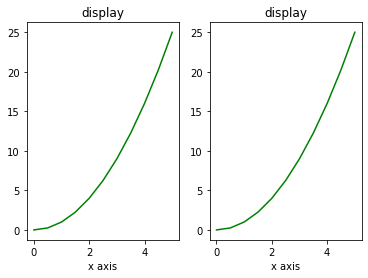

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# Display the figure object 
for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x axis')
    ax.set_title('display')   
plt;

A common issue with matplolib is overlapping subplots or figures. We ca use fig.tight_layout() or plt.tight_layout() method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

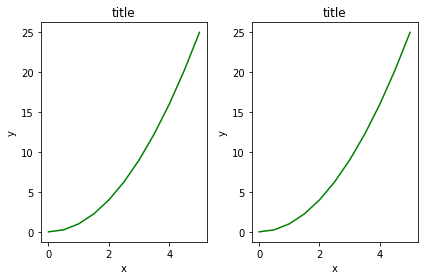

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

Figure size, aspect ratio and DPI


Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the figsize and dpi keyword arguments.

figsize is a tuple of the width and height of the figure in inches

dpi is the dots-per-inch (pixel per inch).

For example:

In [47]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the subplots function:

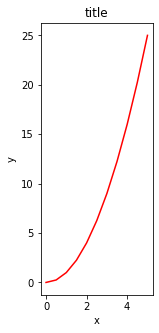

In [48]:
fig, axes = plt.subplots(figsize=(2,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Saving figures

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF.

To save a figure to a file we can use the savefig method in the Figure class:

In [0]:
fig.savefig("filename.png")

Plot range

We can configure the ranges of the axes using the set_ylim and set_xlim methods in the axis object, or axis('tight') for automatically getting "tightly fitted" axes ranges:

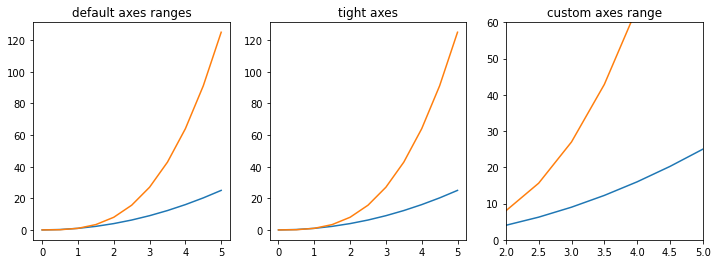

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

Imitate a real-world example

Today we will reproduce this example by FiveThirtyEight:

In [51]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links

Strong Titles Are The Biggest Bang for Your Buck

Remove to improve (the data-ink ratio)

How to Generate FiveThirtyEight Graphs in Python

Make fake prototypes

This helps us understand the problem

In [52]:
# what styles are available in matplotlib? There's one for 538.
print(plt.style.available[:10])
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn']


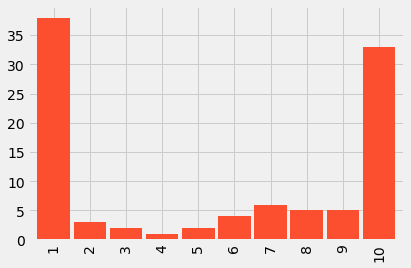

In [53]:
# Create fake data to replicate the blog post figure.
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

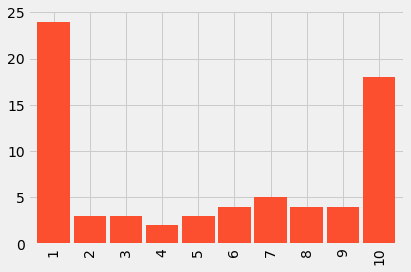

In [54]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

Annotate with text

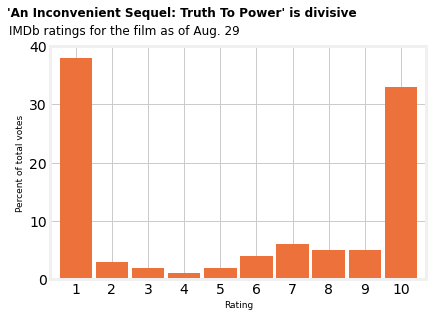

In [55]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [56]:
display(example)

Reproduce with real data


Using this dataset relies on us making two discoveries:
1) The dataset shows logs of the data at different timest
amps and these timestamps are cumulative, meaning that it has all of the ratings as earlier timestamps, but with the new ones added on top. 2) The dataset logs ratings breakdowns for a bunch of different demographic groups per timestamp.

Once we realize these two things, we realize that we only really need 1 line of this dataset to make our graphic, it's the last line that holds the ratings for all IMDb users for the very last time stamp.


In [0]:
# read the data from 538's github repo
df538 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')


In [58]:
df538.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Convert timestamps strings to actual datetime objects
df538['timestamp2'] = pd.to_datetime(df538['timestamp'])

In [60]:
df538[['timestamp', 'timestamp2']].head()

,timestamp,timestamp2
0,2017-07-17 12:28:32.785639,2017-07-17 12:28:32.785639
1,2017-07-17 12:28:33.025600,2017-07-17 12:28:33.025600
2,2017-07-17 12:28:33.273919,2017-07-17 12:28:33.273919
3,2017-07-17 12:28:33.495325,2017-07-17 12:28:33.495325
4,2017-07-17 12:28:33.722849,2017-07-17 12:28:33.722849


In [61]:
# Use the timestamp as the unique index identifier 
# so that we can select rows by timestamp
df538.set_index('timestamp2', inplace=True)
df538.drop('timestamp', axis=1, inplace=True)
df538.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp2,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [62]:
# grab only the rows corresponding to the last day

lastday = df538['2017-08-29']
lastday.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp2,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp2,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [64]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

timestamp2,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [65]:
# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp2,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [66]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


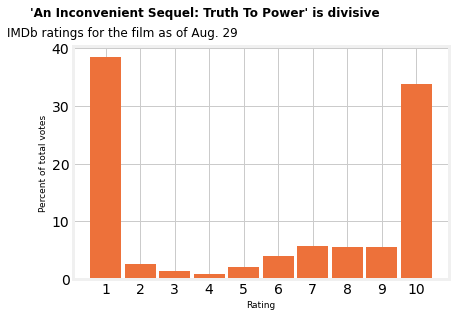

In [67]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

2) Reproduce another example from FiveThityEight's shared data repository.
WARNING: There are a lot of very custom graphs and tables at the above link. I highly recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, seaborn relplot, etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib.


If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought.


If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

In [0]:
assignment = df538['2017-07-17']

In [69]:
data_df = assignment[assignment['category'] == 'IMDb users']
data_df

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp2,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


In [70]:
final2= data_df.tail(1)
final.T

timestamp2,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [71]:
plot_data2 = final2[pct_columns].T
plot_data2.index = range(1,11)
plot_data2.columns = ['percent1']
plot_data2

,percent1
1,45.0
2,2.1
3,1.2
4,0.7
5,1.3
6,1.5
7,2.8
8,3.5
9,4.4
10,37.5


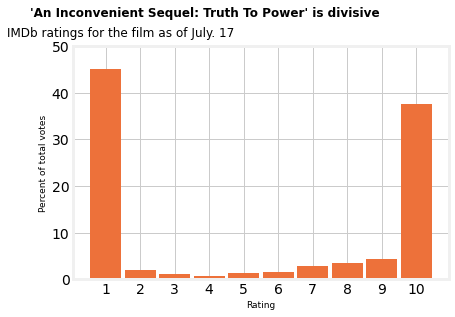

In [72]:
fig, ax = plt.subplots()
# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x= range(1,11), height= plot_data2['percent1'],width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of July. 17", fontsize=12, x=-1.85, y=52)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,60,10))
ax.set_yticks(range(0,60,10));



In [73]:
! unzip trump-approval-ratings.zip

Archive:  trump-approval-ratings.zip
replace trump-approval-ratings/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: trump-approval-ratings/README.md  
replace trump-approval-ratings/approval_polllist.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: trump-approval-ratings/approval_polllist.csv  
replace trump-approval-ratings/approval_topline.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: trump-approval-ratings/approval_topline.csv  


In [74]:
import pandas as pd
poll_df = pd.read_csv('trump-approval-ratings/approval_polllist.csv')
poll_df.head(1)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,3/19/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.241682,0.0,45.0,45.0,45.725344,43.596084,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,20:13:21 19 Mar 2020


In [75]:
poll_df.sort_values(by=['enddate'], ascending=True).head(2)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
6655,Donald Trump,Adults,3/19/2020,12/26/2018,1/1/2019,Ipsos,B-,2482.0,a,0.111727,0.0,41.0,54.0,40.883246,53.086048,NaN,T,https://www.ipsos.com/sites/default/files/ct/n...,57217,92473,1/3/2019,20:14:16 19 Mar 2020
9715,Donald Trump,Voters,3/19/2020,12/30/2018,1/1/2019,YouGov,B-,804.0,rv,0.106534,0.0,43.0,55.0,42.186297,54.610347,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,57205,92440,1/1/2019,20:15:40 19 Mar 2020


In [76]:


poll_df['enddate'] = pd.to_datetime(poll_df.enddate)
poll_df = poll_df.sort_values('enddate')
poll_df = poll_df.reset_index(drop=True)
poll_df= poll_df.round(1)
poll_df.head(5)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,3/19/2020,1/20/2017,2017-01-22,Gallup,B,1500.0,a,0.2,0.0,45.0,45.0,45.7,43.6,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,20:13:21 19 Mar 2020
1,Donald Trump,Voters,3/19/2020,1/20/2017,2017-01-22,Morning Consult,B/C,1992.0,rv,0.7,0.0,46.0,37.0,45.4,37.2,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,20:15:40 19 Mar 2020
2,Donald Trump,Adults,3/19/2020,1/20/2017,2017-01-22,Gallup,B,1500.0,a,0.2,0.0,45.0,45.0,44.9,43.8,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,20:14:16 19 Mar 2020
3,Donald Trump,All polls,3/19/2020,1/20/2017,2017-01-22,Morning Consult,B/C,1992.0,rv,0.7,0.0,46.0,37.0,44.7,38.3,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,20:13:21 19 Mar 2020
4,Donald Trump,Adults,3/19/2020,1/21/2017,2017-01-23,Gallup,B,1500.0,a,0.2,0.0,45.0,46.0,44.9,44.8,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,20:14:16 19 Mar 2020


In [77]:
poll_df['countdown'] = (~poll_df['enddate'].duplicated('last'))[::1].cumsum()

poll_df.tail(5)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp,countdown
11325,Donald Trump,Voters,3/19/2020,3/16/2020,2020-03-18,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.5,0.5,47.0,52.0,42.6,52.8,NaN,T,http://www.rasmussenreports.com/public_content...,64880,120176,3/19/2020,20:15:40 19 Mar 2020,1146
11326,Donald Trump,Adults,3/19/2020,3/16/2020,2020-03-18,YouGov,B-,1000.0,a,0.2,0.2,44.0,52.0,44.0,54.6,NaN,NaN,https://docs.cdn.yougov.com/47z9wynnkt/tabs_Tr...,64873,120150,3/18/2020,20:14:16 19 Mar 2020,1147
11327,Donald Trump,All polls,3/19/2020,3/17/2020,2020-03-19,YouGov,B-,1000.0,a,0.2,0.2,47.0,48.0,47.8,50.3,NaN,NaN,https://docs.cdn.yougov.com/yp737jtf2f/tabs_Tr...,64885,120182,3/19/2020,20:13:21 19 Mar 2020,1147
11328,Donald Trump,Adults,3/19/2020,3/17/2020,2020-03-19,YouGov,B-,1000.0,a,0.2,0.2,47.0,48.0,47.0,50.6,NaN,NaN,https://docs.cdn.yougov.com/yp737jtf2f/tabs_Tr...,64885,120182,3/19/2020,20:14:16 19 Mar 2020,1147
11329,Donald Trump,Voters,3/19/2020,3/17/2020,2020-03-19,YouGov,B-,797.0,rv,0.2,0.2,46.0,52.0,45.2,51.6,NaN,NaN,https://docs.cdn.yougov.com/yp737jtf2f/tabs_Tr...,64885,120183,3/19/2020,20:15:40 19 Mar 2020,1148


In [78]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


app = go.Scatter(name="approve", x=poll_df.enddate, y=poll_df.approve,
                     mode='markers', marker=dict(color="#c5edd0"),
                     line=dict(width=1), fillcolor='rgb(197, 237, 208)',
                     hovertext='%', hoverinfo='y+text+name')

disapp= go.Scatter(name="disapprove", x=poll_df.enddate, y=poll_df.disapprove,
                     mode='markers', marker=dict(color="#f2d2c4"),
                     line=dict(width=1), fillcolor='rgb(242, 210, 196)',
                     hovertext='%', hoverinfo='y+text+name')

data = [app, disapp]

layout = go.Layout(
    yaxis=dict(title=''),
    title='',
    showlegend = False,
    plot_bgcolor='white')
fig = go.Figure(data=data, layout=layout)
fig.add_shape(
            type="line",
            x0='2017-01-22',
            y0=50,
            x1='2020-03-20',
            y1=50,
            line_width=1
        )
fig.update_xaxes(spikemode='across',
                 spikethickness=1,
                 spikecolor='black',
                 showgrid=True, gridwidth=0.5, gridcolor='lightgrey')
fig.update_yaxes(range=[20, 80],
                 showgrid=True, gridwidth=0.5, gridcolor='lightgrey')








fig.show()

In [79]:
poll_df.sort_values(by=['approve'], ascending=True).head(1)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp,countdown
1316,Donald Trump,All polls,3/19/2020,6/15/2017,2017-06-18,icitizen,NaN,1449.0,a,0.5,0.0,23.9,75.9,25.6,70.1,NaN,NaN,https://projects.fivethirtyeight.com.s3.amazon...,50970,80611,2/28/2018,20:13:21 19 Mar 2020,147


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here